<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/ETS_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf


In [2]:
!pip install statsforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.5 MB/s eta 0:00:00


In [3]:

ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']
# Fecha en meses
data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702614,37.795330,11.671397,152.225327,NaN,34.200207,15.430020,11.531770,37.656044,NaN,...,NaN,19.345699,38.958511,38.346157,32.615509,130.751770,NaN,56.302021,88.730598,23.547867
2015-02-01 00:00:00+00:00,70.285484,43.193314,11.671397,159.254822,NaN,37.858753,16.780149,13.125944,44.382275,NaN,...,NaN,13.299150,39.022579,39.573223,34.200775,138.726166,NaN,57.645130,92.414070,23.328482
2015-03-01 00:00:00+00:00,69.477173,42.006325,11.124300,159.635437,NaN,38.791317,16.133081,12.536795,41.835014,NaN,...,NaN,11.775290,42.517673,41.436150,31.358225,126.094261,NaN,56.418171,91.677383,23.035954
2015-04-01 00:00:00+00:00,69.892456,43.400566,11.737050,168.668900,NaN,36.944122,18.360479,13.335611,41.735302,NaN,...,NaN,14.749669,45.450409,42.735741,34.585346,136.695740,NaN,63.874294,101.554520,23.328482
2015-05-01 00:00:00+00:00,70.519707,43.626659,11.744344,176.417740,NaN,37.374531,16.991690,12.993212,42.756985,NaN,...,NaN,13.535469,46.048359,40.197926,36.726261,130.000107,NaN,61.689003,105.901924,22.910900


In [4]:
# Re programar el formato de la fecha
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)


In [5]:
# De columnas las convierte en filas des-pivot (todo en forma vertical), para poder usar más adelante la paqueteria
data = data.melt(ignore_index=False)



In [6]:
data.head()


,Ticker,value
Date,,
2015-01-01,AC.MX,65.702614
2015-02-01,AC.MX,70.285484
2015-03-01,AC.MX,69.477173
2015-04-01,AC.MX,69.892456
2015-05-01,AC.MX,70.519707


In [7]:
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True) # Para quitar el indice de lo que acabamos de crear



In [8]:
df.head() # Renombrando las columnas


,ds,y,unique_id
0,2015-01-01,65.702614,AC.MX
1,2015-02-01,70.285484,AC.MX
2,2015-03-01,69.477173,AC.MX
3,2015-04-01,69.892456,AC.MX
4,2015-05-01,70.519707,AC.MX


In [9]:
# Limpiar valores (NAs - sin valores, limpiar data para poder pronosticar)
df.dropna(inplace=True)


In [10]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

In [11]:
df.head()

,ds,y,unique_id
0,2015-01-01,65.702614,AC.MX
1,2015-02-01,70.285484,AC.MX
2,2015-03-01,69.477173,AC.MX
3,2015-04-01,69.892456,AC.MX
4,2015-05-01,70.519707,AC.MX


In [12]:
train.shape, test.shape


((2573, 3), (336, 3))

In [13]:
from statsforecast.models import AutoETS
from statsforecast.core import StatsForecast

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [14]:
season_length = 12 # Datos mensuales
horizon = len(test['ds'].unique()) # Datos a predecir

models = [AutoETS(season_length=season_length, model='ZZZ')] # ZZZ es no se nada para que la misma libreria. le dice a modelo que seleccione el mejor modelo


In [21]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [22]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoETS])

In [25]:
sf.fitted_[0,0].model_.keys()


dict_keys(['loglik', 'aic', 'bic', 'aicc', 'mse', 'amse', 'fit', 'residuals', 'components', 'm', 'nstate', 'fitted', 'states', 'par', 'sigma2', 'n_params', 'method', 'actual_residuals'])

In [26]:
sf.fitted_[0,0].model_['method']


'ETS(M,N,N)'

In [27]:
sf.fitted_[0,0].model_['amse']


46.88420878344734

In [28]:
sf.fitted_[0,0].predict_in_sample()


{'fitted': array([ 65.54665353,  65.70259823,  70.28502603,  69.47725364,
         69.89241453,  70.519644  ,  67.43883045,  73.23026339,
         72.15857733,  71.87905628,  79.86059856,  78.8042362 ,
         79.05332744,  81.86993468,  83.51633772,  90.19174572,
         89.68646716,  94.11213673, 100.54108983,  92.53295116,
         89.90092851,  88.51216282,  90.23803235,  83.2880791 ,
         82.91149854,  86.30981028,  86.31783214,  99.81156248,
        106.54057154, 102.24535602, 106.15846027, 102.72665394,
        101.80796846,  96.88922483,  94.96638646,  99.32450769,
        105.80014888, 105.11592079, 101.83934747,  97.84649155,
        100.60895377,  93.15340981,  96.84753094,  98.00431699,
         93.12530484,  95.75447491,  80.91929983,  83.29402825,
         86.9536135 ,  88.10247757,  86.09074685,  85.65491267,
         85.24299164,  84.76626777,  84.0379833 ,  82.4843549 ,
         84.97638194,  86.31979668,  86.96725092,  83.76309968,
         83.0507228 ,  86.6837

In [29]:
test_hat = sf.forecast(fitted = True, h = horizon) # pronosticar conforme a los valores ajustados segun el horizonte

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [30]:
train_hat = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [31]:
fitted = sf.fit_predict(df=train, h = horizon)


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [32]:
fitted.head()


,ds,AutoETS
unique_id,,
AC.MX,2023-01-01,147.468244
AC.MX,2023-02-01,147.468244
AC.MX,2023-03-01,147.468244
AC.MX,2023-04-01,147.468244
AC.MX,2023-05-01,147.468244


In [33]:
test_hat.head()

,ds,AutoETS
unique_id,,
AC.MX,2023-01-01,147.468244
AC.MX,2023-02-01,147.468244
AC.MX,2023-03-01,147.468244
AC.MX,2023-04-01,147.468244
AC.MX,2023-05-01,147.468244


In [34]:
train_hat.head()

,ds,y,AutoETS
unique_id,,,
AC.MX,2015-01-01,65.702614,65.546654
AC.MX,2015-02-01,70.285484,65.702598
AC.MX,2015-03-01,69.477173,70.285026
AC.MX,2015-04-01,69.892456,69.477254
AC.MX,2015-05-01,70.519707,69.892415


In [24]:
from sklearn import metrics
import numpy as np

In [35]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoETS']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [36]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())


MAPE score for AC.MX: 7.900414932538456
MAPE score for ALSEA.MX: 30.63529597845907
MAPE score for AMXB.MX: 9.16242857358491
MAPE score for ASURB.MX: 9.520855368262927
MAPE score for BBAJIOO.MX: 7.885179114813024
MAPE score for BIMBOA.MX: 8.528558259617197
MAPE score for BOLSAA.MX: 10.141927307308498
MAPE score for CEMEXCPO.MX: 29.306710095616612
MAPE score for CHDRAUIB.MX: 16.559518744076804
MAPE score for CUERVO.MX: 11.604977783598985
MAPE score for GAPB.MX: 11.260776183706657
MAPE score for GCARSOA1.MX: 29.41028439290447
MAPE score for GCC.MX: 11.273317047422145
MAPE score for GENTERA.MX: 7.59733802696856
MAPE score for GFNORTEO.MX: 14.144420082567159
MAPE score for GMEXICOB.MX: 18.758695849312613
MAPE score for GRUMAB.MX: 11.276635781428123
MAPE score for KIMBERA.MX: 13.349098166945407
MAPE score for KOFUBL.MX: 9.728624300206974
MAPE score for LABB.MX: 16.02616286147847
MAPE score for MEGACPO.MX: 18.672258592161384
MAPE score for OMAB.MX: 16.083248143855872
MAPE score for ORBIA.MX: 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

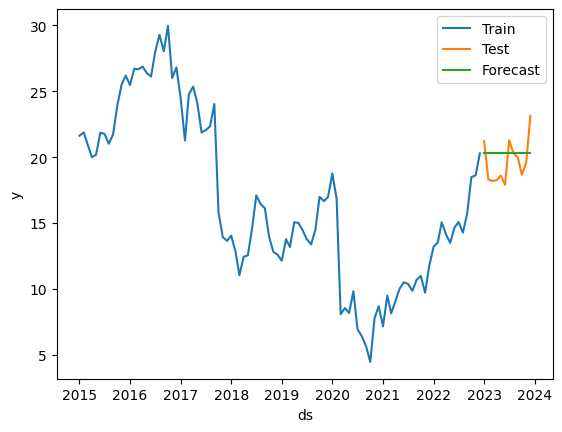

In [38]:
sns.lineplot(train[train['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'GENTERA.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [39]:
sf.fitted_[14,0].model_['method']


'ETS(M,N,N)'

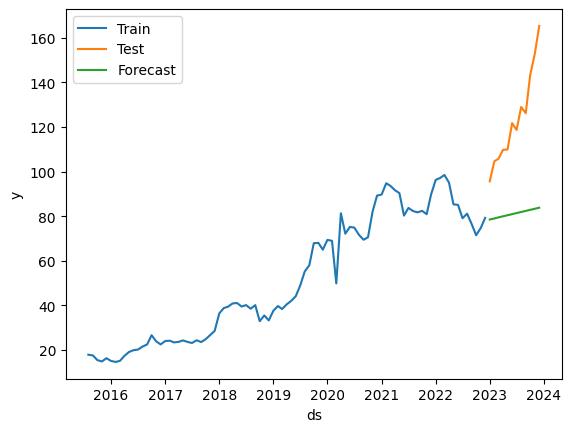

In [40]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [41]:
sf.fitted_[24,0].model_['method']


'ETS(M,A,N)'